In [1]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import math
import matplotlib.pylab as plt
%matplotlib inline

## Stats on Output and Citation

## http://www.ref.ac.uk/2014/about/guidance/citationdata/
## citations were provided by Elsevier who own Scopus and thus the data is from Scopus

# Load and clean the output file
output_or = pd.read_csv("REF2014Data_output.csv")


# Clear the dataframe to include only values required
output = output_or.drop(output_or.columns[[range(1,27)]], axis=1)
output = output.drop(output.columns[[2,3,4]], axis=1)

In [2]:
# Load the submission profile file and clean it
sub_prof_or = pd.read_csv("REF2014Data_submissionprofile.csv")

# Keep only rows of overall score
subprof = sub_prof_or[sub_prof_or["Profile"].str.contains("Overall")]

# Drop irrelevant columns
subprof = subprof.drop(subprof.columns[[1,2,3,5,6,7,8]], axis=1)

# Gather the four star for each uni
unifour = {}

for index, row in subprof.iterrows():
    unifour[row["UKPRN"]] = row["FourStar"]
    
len(unifour)

21

In [3]:
# Load the submission profile file and clean it
resinc_or = pd.read_csv("REF2014Data_researchincome.csv")

# Drop irrelevant columns
resinc = resinc_or.drop(resinc_or.columns[[1,2,3]], axis=1)

resinc_col_list = list(resinc)

resinc_col_list.remove('UKPRN') 

resinc['TotalInc'] = resinc[resinc_col_list].sum(axis=1)

tot_inc = {}

for index, row in resinc.iterrows():
    item = row["UKPRN"]
    if item not in tot_inc:
        tot_inc[item] = row['TotalInc']/1000000
    else:
        tot_inc[item] += row['TotalInc']/1000000

combined = list()

for item in tot_inc:
    if item in unifour:
        combined.append((tot_inc[item], unifour[item]))
        
tot_inc_x, unifour_y = zip(*combined)

In [4]:
## Check against one star
## The theory is that less citations will increase one star

# Keep only rows of overall score
subproft = sub_prof_or[sub_prof_or["Profile"].str.contains("Overall")]

# Drop irrelevant columns
subproft = subproft.drop(subproft.columns[[1,2,3,4,5,8]], axis=1)


# Gather the one & two star for each uni
unilow = {}

for index, row in subproft.iterrows():
    unilow[row["UKPRN"]] = row["OneStar"] + row["TwoStar"]
    
combinedlow = list()

for item in unilow:
    if item in tot_inc:
        combinedlow.append((tot_inc[item], unilow[item]))
tot_inc_xx, unilow_y = zip(*combinedlow)

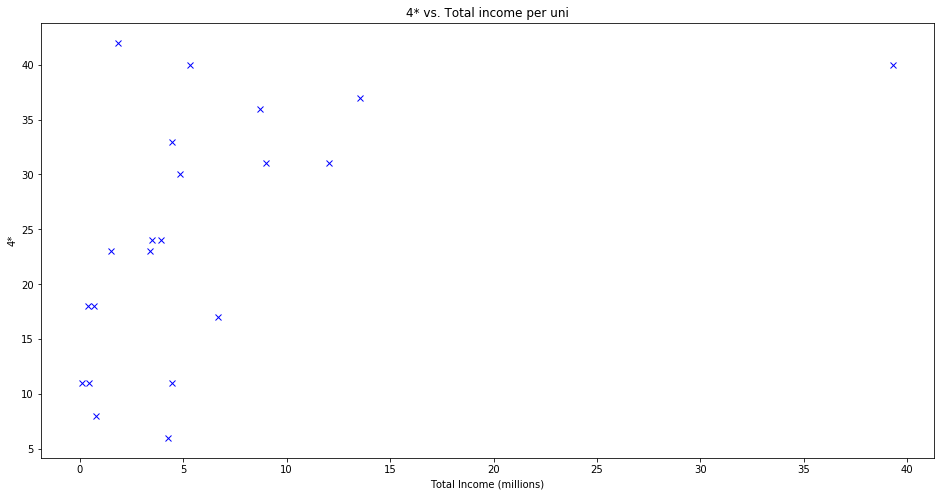

In [5]:

fig, ax = plt.subplots(figsize=(16, 8))
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.plot(tot_inc_x, unifour_y, "bx")
plt.title("4* vs. Total income per uni")
ax.set(xlabel = "Total Income (millions)", ylabel = "4*")

#plt.savefig("Inc4*")

In [6]:
## Correlation of four star against total income:
pearsonr(tot_inc_x, unifour_y)

(0.50507854959976839, 0.019523060848396698)

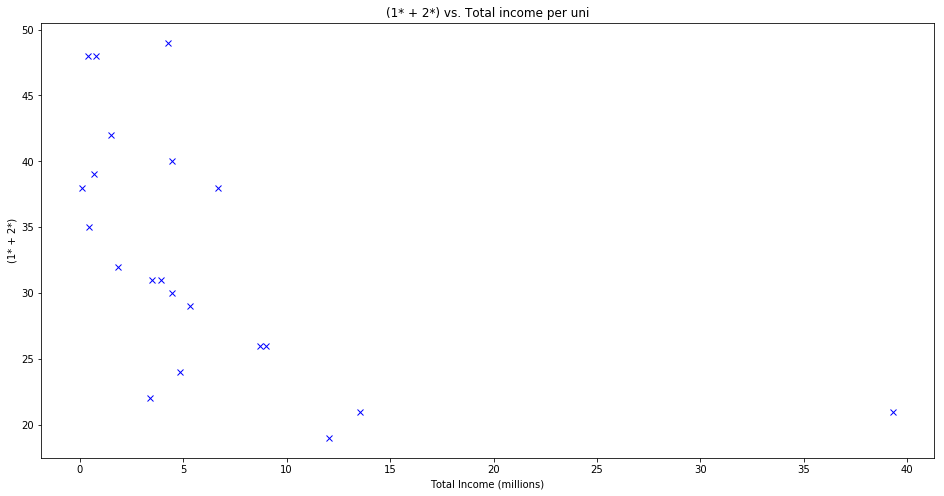

In [7]:
plt.figure("Inc3*")
fig, ax = plt.subplots(figsize=(16, 8))
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.plot(tot_inc_x, unilow_y, "bx")
plt.title("(1* + 2*) vs. Total income per uni")
ax.set(xlabel = "Total Income (millions)", ylabel = "(1* + 2*)")

#plt.savefig("Inc3*")

In [8]:
## Correlation of four star against total income:
pearsonr(tot_inc_x, unilow_y)

(-0.54680349445195631, 0.010315659134935824)